# Data for national parks

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# table from https://www.latlong.net/category/national-parks-236-42.html

raw = """
Grand Teton National Park, WY, USA	43.790802	-110.684944
Grand Canyon National Park: A Natural Wonder of the World	36.266033	-112.363808
Capitol Reef National Park, UT, USA	38.089600	-111.149910
Pinnacles National Park, CA, USA	36.491508	-121.197243
Rocky Mountain National Park, CO, USA	40.343182	-105.688103
Offshore Trap/Pot Waters Area, Western Atlantic Ocean, the US	38.000000	-82.000000
Steller Sea Lion Protection Area, AL, the US	57.466667	-153.433334
Pacific Remote Islands Marine National Monument, the US	16.736944	-169.523895
Danville Conservation Area, New Florence, MO, USA	38.865097	-91.504852
Sand Harbor State Park, Incline Village, NV, USA	39.198364	-119.930984
White Sands National Park, NM, the US	32.779720	-106.171669
Jackson Hole, WY, USA	43.582767	-110.821999
Mojave National Preserve, Kelso, CA, USA	35.141689	-115.510399
Joshua Tree National Park, California, USA	33.881866	-115.900650
Buffalo National River, St Joe, AR, USA	35.985512	-92.757652
Hot Springs National Park, Hot Springs, AR, USA	34.521530	-93.042267
Kartchner Caverns State Park, Benson, AZ, USA	31.837551	-110.347382
Navajo Nation Reservation, New Mexico, USA	36.075321	-109.196930
Sipsey Wilderness, Mt Hope, AL, USA	34.332035	-87.434799
Wrangell-St. Elias National Park & Preserve, Alaska, USA	61.710445	-142.985687
Lake Clark National Park and Preserve, Port Alsworth, AK, USA	60.412697	-154.323502
Katmai National Park and Preserve, King Salmon, AK, USA	58.597813	-154.693756
Glacier Bay National Park and Preserve, Alaska, USA	58.665806	-136.900208
Turtle Mountain, ND, USA	48.852882	-99.803535
Odiorne Point State Park, Rye, NH, USA	43.049023	-70.720192
Channel Islands National Park, Ventura, CA, USA	33.998028	-119.772949
Maplewood State Park, Pelican Rapids, MN, USA	46.520966	-95.951576
Bear Butte State Park, Sturgis, SD, USA	44.475296	-103.424309
Okefenokee National Wildlife Refuge, Folkston, GA, USA	30.773230	-82.292732
Denali National Park and Preserve, Alaska, USA	63.129887	-151.197418
Acadia National Park, Maine, USA	44.338974	-68.273430
Topanga State Park, Topanga, CA, USA	34.093182	-118.587318
Gates of the Arctic National Park and Preserve, AK, USA	67.915199	-153.463730
Kaloko-Honokōhau National Historical Park, Kailua-Kona, HI, USA	19.678328	-156.020477
Pedernales Falls State Park, Johnson City, TX, USA	30.308069	-98.257729
Whiskeytown National Recreation Area, Whiskeytown, CA, USA	40.633495	-122.564247
Mesa Verde National Park, Mesa Verde, CO, USA	37.230873	-108.461838
Arches National Park, Utah, USA	38.733082	-109.592514
Mount Rainier National Park, Washington, USA	46.879967	-121.726906
Kenai Fjords National Park, Alaska, USA	60.043777	-149.816360
Anahuac National Wildlife Refuge, Anahuac, TX, USA	29.610300	-94.449081
Bandelier National Monument, Los Alamos, NM, USA	35.767288	-106.311607
Summit Bechtel Reserve, Glen Jean, WV, USA	37.916035	-81.123047
Yellowstone National Park, WY, USA	44.427895	-110.588379
Rothrock State Forest, State College, PA, USA	40.720585	-77.826965
Great Smoky Mountains National Park, Tennessee, USA	35.611763	-83.489548
Zion National Park, Utah, USA	37.297817	-113.028770
Yosemite National Park, California, USA	37.865101	-119.538330
Yellowstone National Park, Wyoming, USA	44.429764	-110.584663
Haleakalā National Park, Hawaii, USA	20.701283	-156.173325
Malibu Creek State Park, Calabasas, CA, USA	34.105156	-118.731316
Manti-La Sal National Forest, Price, UT, USA	39.187050	-111.379890
Cherry Creek State Park, Aurora, CO, USA	39.639973	-104.831863
Kissimmee Prairie Preserve State Park, Okeechobee, FL, USA	27.612417	-81.053383
Garden of Gods, Colorado Springs, CO, USA	38.873840	-104.886665
Petrified Forest National Park, Arizona, USA	34.909988	-109.806793
Fort Berthold Indian Reservation, ND, USA	47.683880	-102.354126
Chattahoochee National Forest, Suches, GA, USA	34.765972	-84.143517
Kings Canyon National Park, CA, USA	36.887856	-118.555145
Yellowstone National Park, WY, USA	44.427284	-110.584389
Grant Park, Chicago, IL, USA	41.876465	-87.621887
Crater Lake National Park, OR, USA	42.944611	-122.109245
Shenandoah National Park, VA, USA	38.700516	-78.292694
Yellowstone National Park, WY, USA	44.446037	-110.587349
Everglades National Park, FL, USA	25.286615	-80.898651
Mt Hood National Forest, OR, USA	45.227173	-121.839455
Bryce Canyon National Park, Utah, USA	37.593048	-112.187332
Mammoth Cave National Park, KY, USA	37.183640	-86.159943
Redwood National and State Parks, CA, USA	41.213181	-124.004631
Yellowstone National Park, USA	44.423691	-110.588516
"""

In [3]:
data = [i.split('\t') for i in raw.split('\n') if i != '']
data = [(i[0].split(',')[0], float(i[1]), float(i[2]) + 360) for i in data]

In [4]:
locations = pd.DataFrame(data, columns=['Name', 'Latitude', 'Longitude'])

In [5]:
locations.to_csv('national_park_locations.csv', index=False)

In [6]:
locations

,Name,Latitude,Longitude
0,Grand Teton National Park,43.790802,249.315056
1,Grand Canyon National Park: A Natural Wonder o...,36.266033,247.636192
2,Capitol Reef National Park,38.089600,248.850090
3,Pinnacles National Park,36.491508,238.802757
4,Rocky Mountain National Park,40.343182,254.311897
...,...,...,...
65,Mt Hood National Forest,45.227173,238.160545
66,Bryce Canyon National Park,37.593048,247.812668
67,Mammoth Cave National Park,37.183640,273.840057
68,Redwood National and State Parks,41.213181,235.995369


In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
minlat, maxlat = locations.Latitude.min(), locations.Latitude.max()
minlon, maxlon = locations.Longitude.min(), locations.Longitude.max()

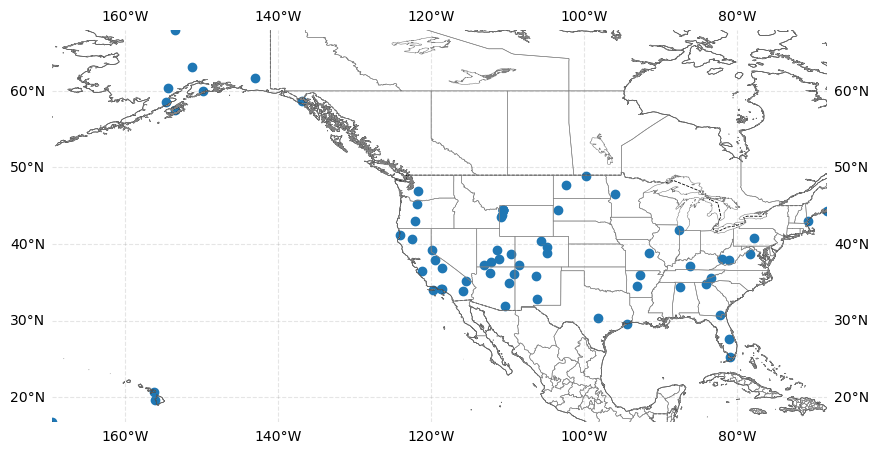

In [9]:
crs = ccrs.AlbersEqualArea(central_latitude=39.8283, central_longitude=-98.5795)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(projection=crs))

ax.set_extent([minlon, maxlon, minlat, maxlat], ccrs.PlateCarree())
ax.gridlines(draw_labels=True, alpha=0.2, color='gray', linestyle='--')

ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=0.5)
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle='--', linewidth=0.6)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.4, edgecolor='gray')

ax.scatter(locations.Longitude, locations.Latitude)

# for index, row in locations.iterrows():
#     ax.text(row.Longitude, row.Latitude, row.Name, color='blue', transform=ccrs.PlateCarree(), ha='center', va='bottom')

ax.spines[:].set_visible(False)

In [10]:
air = xr.tutorial.load_dataset("air_temperature")

In [11]:
air

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [12]:
for index, row in locations.iterrows():
    a = air.sel(lat=row.Latitude, lon=row.Longitude, method='nearest')
    df = a.to_pandas().reset_index().drop(['lat', 'lon'], axis=1)
    name = f"{row.Name.replace(' ', '-').replace('/', '-')}_{row.Longitude}_{row.Latitude}_.csv"
    df.to_csv(f"data/{name}", index=False)

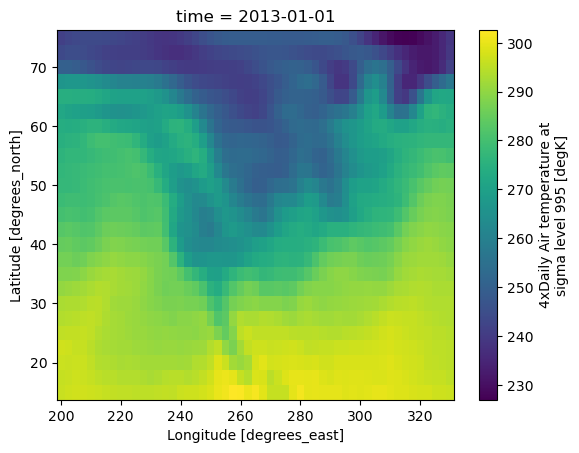

In [13]:
air.isel(time=0)['air'].plot()

In [14]:
air.lon.values

array([200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. ,
       222.5, 225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5,
       245. , 247.5, 250. , 252.5, 255. , 257.5, 260. , 262.5, 265. ,
       267.5, 270. , 272.5, 275. , 277.5, 280. , 282.5, 285. , 287.5,
       290. , 292.5, 295. , 297.5, 300. , 302.5, 305. , 307.5, 310. ,
       312.5, 315. , 317.5, 320. , 322.5, 325. , 327.5, 330. ],
      dtype=float32)

In [15]:
air.lat.values

array([75. , 72.5, 70. , 67.5, 65. , 62.5, 60. , 57.5, 55. , 52.5, 50. ,
       47.5, 45. , 42.5, 40. , 37.5, 35. , 32.5, 30. , 27.5, 25. , 22.5,
       20. , 17.5, 15. ], dtype=float32)